In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#Covid Data

covid = pd.read_csv('covidData.csv')

#convert to date
covid.submission_date=pd.to_datetime(covid.submission_date)
covid.created_at=pd.to_datetime(covid.created_at)

#drop columns
covid = covid.drop(columns=['Unnamed: 0','prob_cases','pnew_case','pnew_death'])

,submission_date,state,tot_cases,conf_cases,new_case,tot_death,conf_death,prob_death,new_death,created_at,consent_cases,consent_deaths
0,2020-11-13,CO,154038,146023.0,6439,2504,2096.0,408.0,36,2020-11-14 14:44:00,Agree,Agree
1,2020-11-14,CO,159234,151115.0,5196,2525,2116.0,409.0,21,2020-11-15 15:12:00,Agree,Agree
2,2020-11-15,CO,163417,155258.0,4183,2546,2137.0,409.0,21,2020-11-16 18:40:00,Agree,Agree
3,2020-11-16,CO,167713,158864.0,4296,2578,2153.0,425.0,32,2020-11-17 14:52:00,Agree,Agree
4,2020-11-17,CO,172044,163076.0,4331,2608,2177.0,431.0,30,2020-11-18 14:57:00,Agree,Agree
5,2020-11-18,CO,176694,167626.0,4650,2651,2207.0,444.0,43,2020-11-19 15:01:00,Agree,Agree
6,2020-11-19,CO,182801,173653.0,6107,2730,2277.0,453.0,79,2020-11-20 15:06:00,Agree,Agree
7,2020-11-13,FL,858585,NaN,6760,17445,NaN,NaN,73,2020-11-14 14:44:00,Not agree,Not agree
8,2020-11-14,FL,862990,NaN,4405,17489,NaN,NaN,44,2020-11-15 15:12:00,Not agree,Not agree
9,2020-11-15,FL,872810,NaN,9820,17518,NaN,NaN,29,2020-11-16 18:40:00,Not agree,Not agree


In [12]:
#most new cases by state

by_state_covid = covid.groupby(['state',]).sum()
by_state_covid.nlargest(3, 'new_case')

,tot_cases,conf_cases,new_case,tot_death,conf_death,prob_death,new_death
state,,,,,,,
IL,4099809,4099809.0,84841,78778,75762.0,3016.0,802
CA,7200493,0.0,67658,127996,0.0,0.0,358
TX,7216532,0.0,67042,137620,0.0,0.0,966


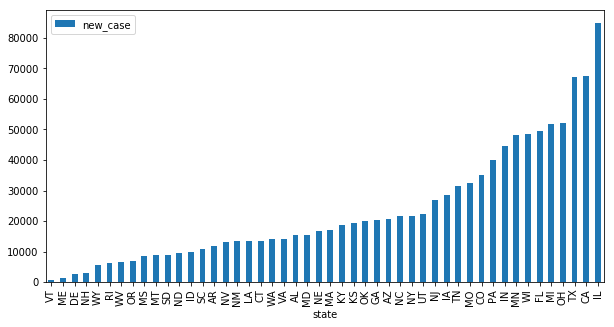

In [13]:
#plot new cases by state
s_plot = by_state_covid.reset_index().sort_values(by='new_case')

fs = (10, 5)
s_plot.plot(x='state',y='new_case', kind='bar', figsize=fs)

(0, 200000)

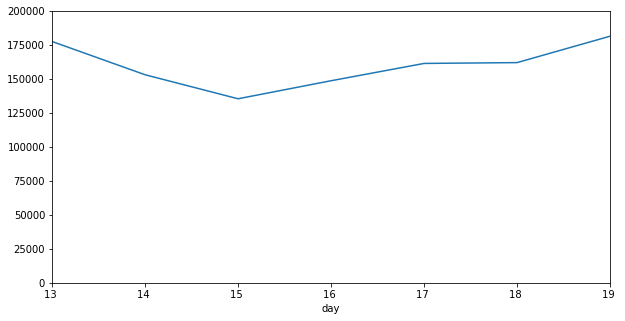

In [44]:
#plot cases by day

#insert day column
covid['day'] = covid.submission_date.apply(lambda x: str(x)[8:11])

#group df by day and sum the new cases values
cases_daily = covid.groupby('day').sum()['new_case']

#plot the group object
cases_daily.plot(figsize=fs).set_ylim(0,200000)

In [49]:
#read in tweet data

tweets = pd.read_csv('all_scores.csv')


tweets=tweets.drop(columns=['Unnamed: 0', 'ID'])
str(tweets.time[0])[8:10]

tweets['day'] = tweets.time.apply(lambda x: int(str(x)[8:10]))

tweets = tweets[tweets['day'] < 20]

Text(0.5, 1.0, 'All Tweets')

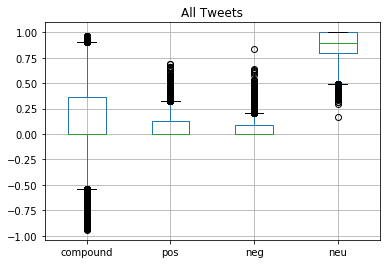

In [50]:
#Summarise Scores

tweets.boxplot(column=['compound', 'pos','neg','neu']).plot()
plt.title('All Tweets')

Text(0.5, 1.0, 'Tweet Sentiment Over Time')

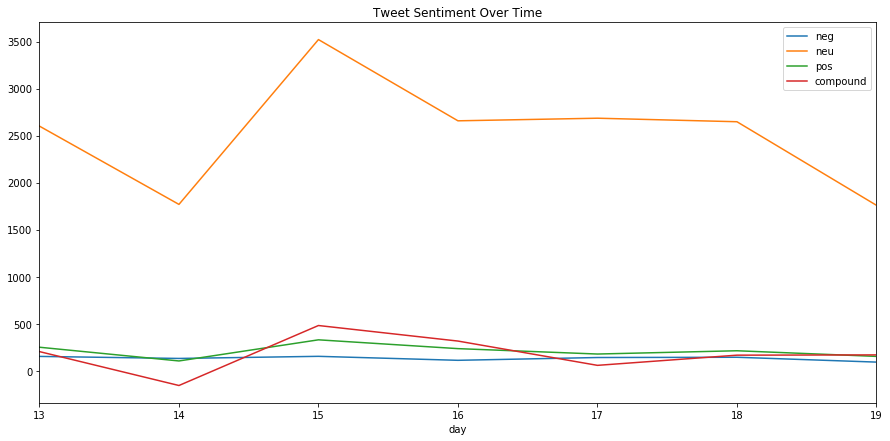

In [57]:
#get tweet sentiment over time
fig, ax = plt.subplots(figsize=(15,7))

# ads.set_index('time','compund').groupby(pd.Grouper(freq='D')).sum().plot(ax=ax)

#group tweets by day and get sum
tweets_daily_sum=tweets.groupby('day')['neg', 'neu', 'pos','compound'].apply(lambda x:x.sum())



tweets_daily_sum.plot(ax=ax)
plt.title('Tweet Sentiment Over Time')

Text(0.5, 1.0, 'Tweet Sentiment and New Cases')

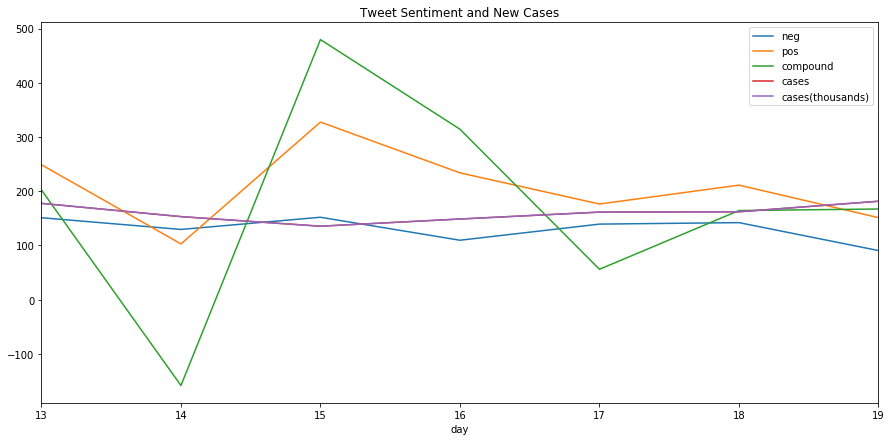

In [68]:
#combine covid and tweet data on day

combined = tweets_daily_sum.drop(columns=['neu'])

combined['cases(thousands)'] = cases_daily.values/1000


combined.plot(figsize=(15,7))
plt.title('Tweet Sentiment and New Cases')